In [2]:
from speechbrain.pretrained import VAD
import numpy as np
import torchaudio
import os
#import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import resample
import time

In [3]:
#VAD = VAD.from_hparams(source="speechbrain/vad-crdnn-libriparty", savedir="pretrained_models/vad-crdnn-libriparty", run_opts={"device":"cuda"} )
VAD = VAD.from_hparams(source="speechbrain/vad-crdnn-libriparty", savedir="pretrained_models/vad-crdnn-libriparty")

In [4]:
path = "../dataset/Genea2023/val/main-agent/wav"
out = "../dataset/Genea2023/val/main-agent/vad"
fps = 30
sr = 16000
for file in os.listdir(path):
    start = time.time()
    print('Processing file {}'.format(file))
    audio, old_sr = torchaudio.load(os.path.join(path,file))
    audio = torchaudio.functional.resample(audio, orig_freq=sr, new_freq=sr)
    tmpfile = os.path.join(path, "tmp.wav")
    torchaudio.save(
       tmpfile , audio, sr
    )
    boundaries = VAD.get_speech_prob_file(audio_file=tmpfile, large_chunk_size=4, small_chunk_size=0.2)
    boundaries = resample(boundaries[0,:,0], int(boundaries.shape[1]*30/100))
    boundaries[boundaries>=0.5] = 1
    boundaries[boundaries<0.5] = 0
    np.save(os.path.join(out, file[:-4]+'.npy'), boundaries)
    print('Done ', time.time()-start)

Processing file val_2023_v0_000_main-agent.wav
Done  4.054271459579468
Processing file val_2023_v0_001_main-agent.wav
Done  3.7792255878448486
Processing file val_2023_v0_002_main-agent.wav
Done  3.4073433876037598
Processing file val_2023_v0_003_main-agent.wav
Done  3.3678228855133057
Processing file val_2023_v0_004_main-agent.wav
Done  3.5903663635253906
Processing file val_2023_v0_005_main-agent.wav
Done  3.7675397396087646
Processing file val_2023_v0_006_main-agent.wav
Done  4.005434274673462
Processing file val_2023_v0_007_main-agent.wav
Done  3.495917797088623
Processing file val_2023_v0_008_main-agent.wav
Done  3.692913293838501
Processing file val_2023_v0_009_main-agent.wav
Done  3.400317907333374
Processing file val_2023_v0_010_main-agent.wav
Done  3.5441513061523438
Processing file val_2023_v0_011_main-agent.wav
Done  4.702300786972046
Processing file val_2023_v0_012_main-agent.wav
Done  4.3437652587890625
Processing file val_2023_v0_013_main-agent.wav
Done  4.006887197494507

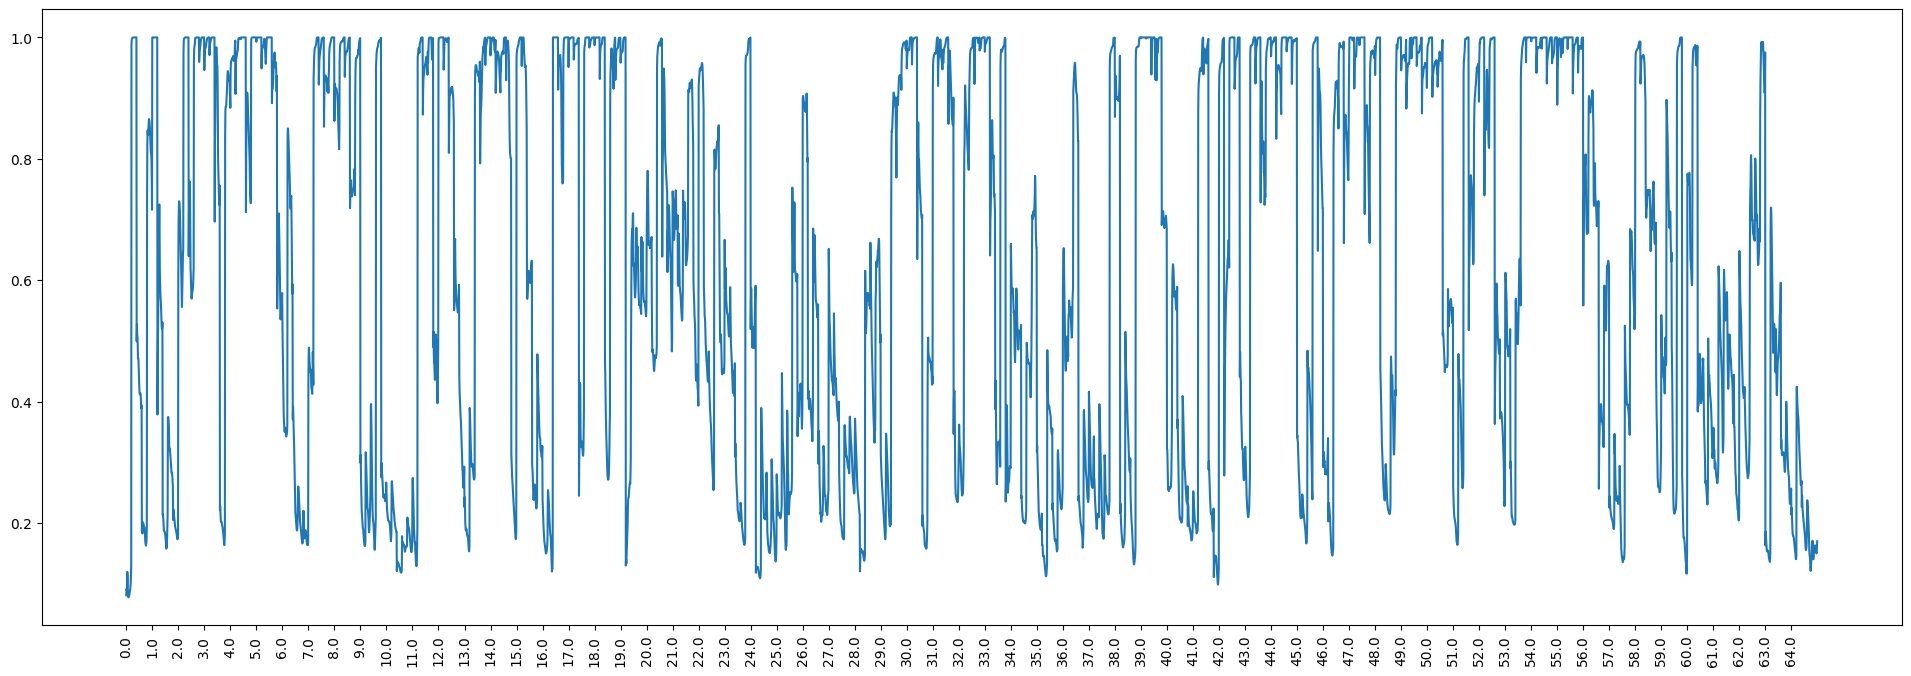

In [56]:
fig = plt.figure(figsize=(24,8))
plt.plot(np.arange(boundaries.shape[1]), boundaries[0,:,0])
x = np.arange(0,boundaries.shape[1]/100,1)
y = [str(i) for i in x]
x *= 100
plt.xticks(x, y, rotation='vertical')
plt.show()

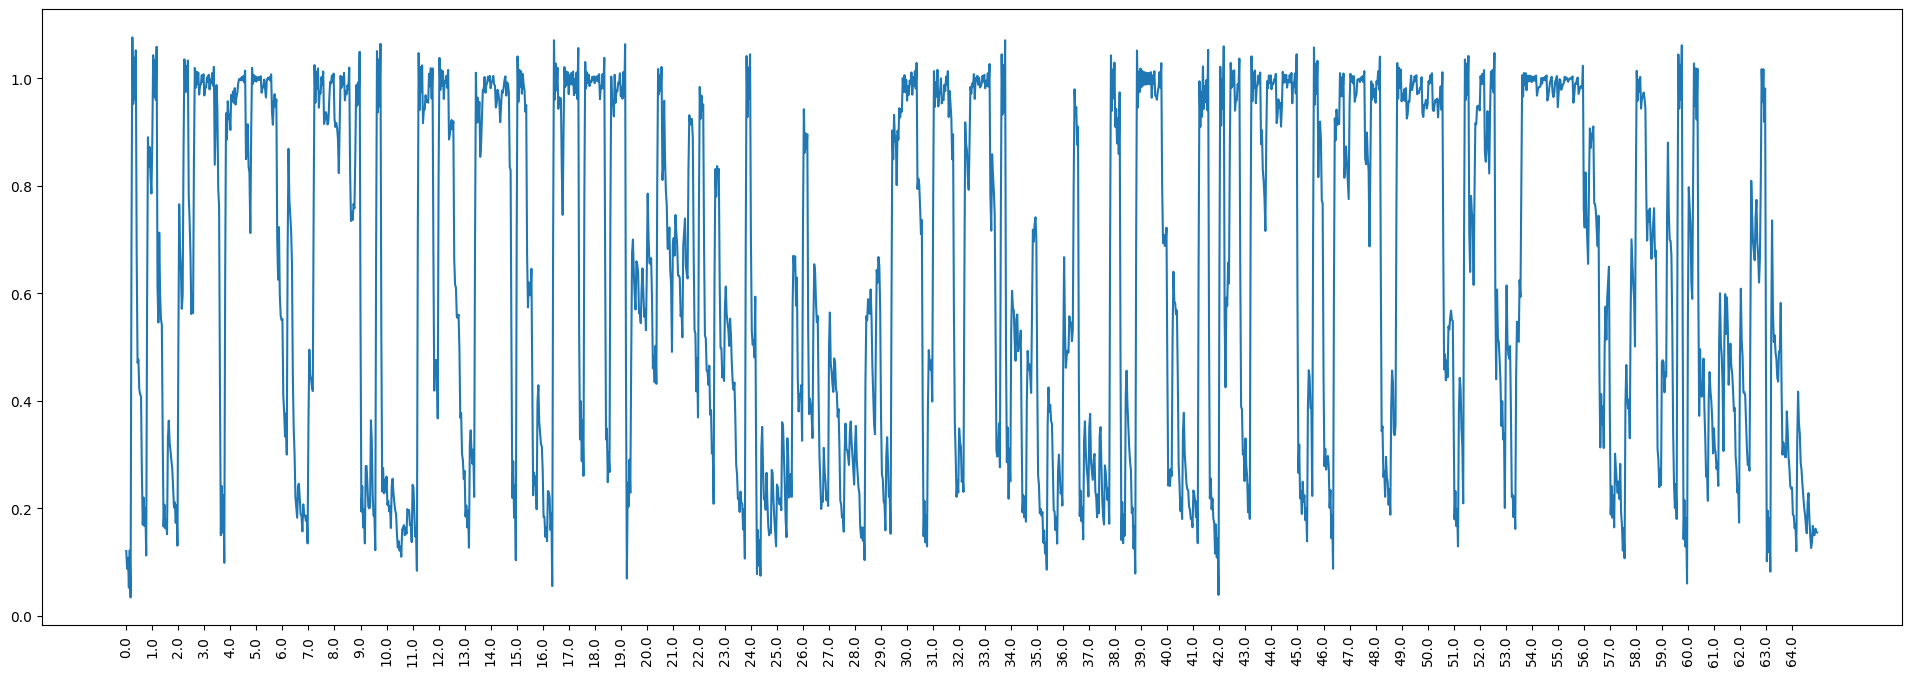

In [59]:
fig = plt.figure(figsize=(24,8))
plt.plot(np.arange(boundaries.shape[0]), boundaries)
x = np.arange(0,boundaries.shape[0]/30,1)
y = [str(i) for i in x]
x *= 30
plt.xticks(x, y, rotation='vertical')
plt.show()

In [60]:
boundaries[boundaries>=0.5] = 1
boundaries[boundaries<0.5] = 0

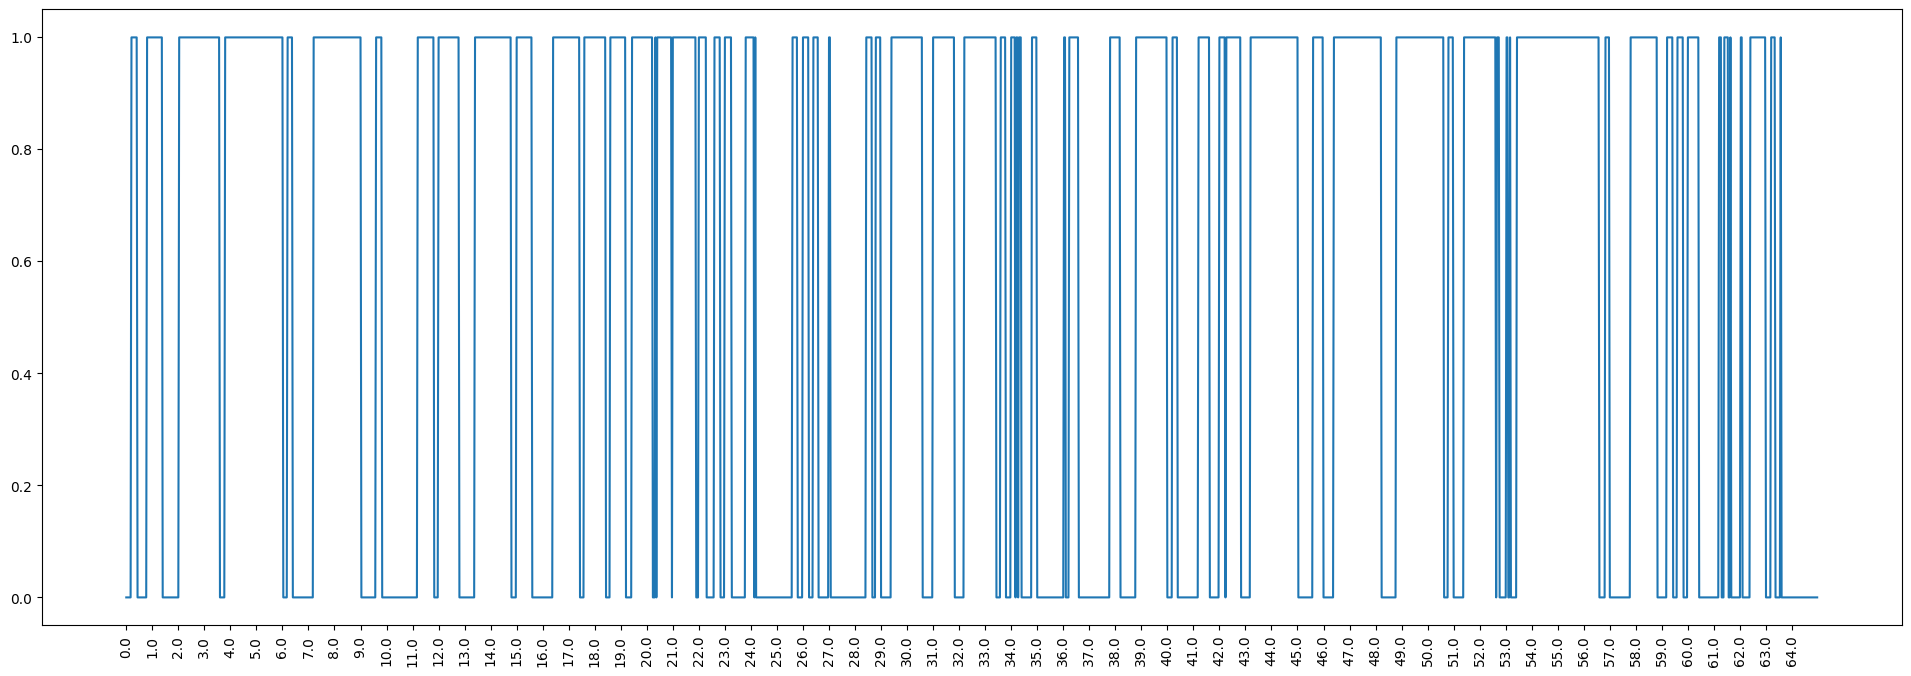

In [61]:
fig = plt.figure(figsize=(24,8))
plt.plot(np.arange(boundaries.shape[0]), boundaries)
x = np.arange(0,boundaries.shape[0]/30,1)
y = [str(i) for i in x]
x *= 30
plt.xticks(x, y, rotation='vertical')
plt.show()